In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# train_v2.csv

In [15]:
train = pd.read_csv("../data/raw/train_v2.csv")

In [16]:
train.info() # 결측치 없음
train.describe() # 이상치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970960 entries, 0 to 970959
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   msno      970960 non-null  object
 1   is_churn  970960 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 14.8+ MB


,is_churn
count,970960.000000
mean,0.089942
std,0.286099
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


## `is_churn` 분포 확인 

In [17]:
train["is_churn"].value_counts()

is_churn
0    883630
1     87330
Name: count, dtype: int64

In [18]:
train["is_churn"].value_counts(normalize=True)

is_churn
0    0.910058
1    0.089942
Name: proportion, dtype: float64

# members_v3.csv

In [19]:
members = pd.read_csv("../data/raw/members_v3.csv")

members.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915


In [20]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6769473 entries, 0 to 6769472
Data columns (total 6 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   msno                    object
 1   city                    int64 
 2   bd                      int64 
 3   gender                  object
 4   registered_via          int64 
 5   registration_init_time  int64 
dtypes: int64(4), object(2)
memory usage: 309.9+ MB


## members 컬럼 설명

| 컬럼 이름 | 설명 |
|----------|------|
| msno | 사용자 ID (User ID). 모든 데이터셋에서 사용자를 식별하는 고유 ID |
| city | 사용자가 거주하는 도시 코드 (익명 처리된 정수 값) |
| bd | 사용자의 나이(Birth Date). 실제 나이와 불일치하거나 이상치가 포함될 수 있음 |
| gender | 사용자의 성별 (male, female 또는 결측) |
| registered_via | 사용자가 KKBox 서비스에 등록한 방법(채널)을 나타내는 코드 (익명 처리된 정수 값) |
| registration_init_time | 사용자가 회원 가입을 한 날짜 (YYYYMMDD 형식) |


## `registration_init_time` 최소/최대치 확인

In [21]:
print(members["registration_init_time"].min(), members["registration_init_time"].max())

20040326 20170429


## `gender`
### 결측치 발견
1. `gender`: 전체 member 대비 약 65.4% 비율이 결측됨
    - 삭제하기엔 너무 많은 비율이기 때문에, "unknown" 새로운 범주로 채움

In [22]:
missing_rate = members.isna().mean().sort_values(ascending=False)
print(missing_rate)

gender                    0.654335
msno                      0.000000
city                      0.000000
bd                        0.000000
registered_via            0.000000
registration_init_time    0.000000
dtype: float64


In [23]:
members["gender"] = members["gender"].astype("object").fillna("unknown")
print(members["gender"].value_counts(dropna=False))

gender
unknown    4429505
male       1195355
female     1144613
Name: count, dtype: int64


## `city`
1. 1 ~ 22가 있다.
2. 1이 제일 많다.

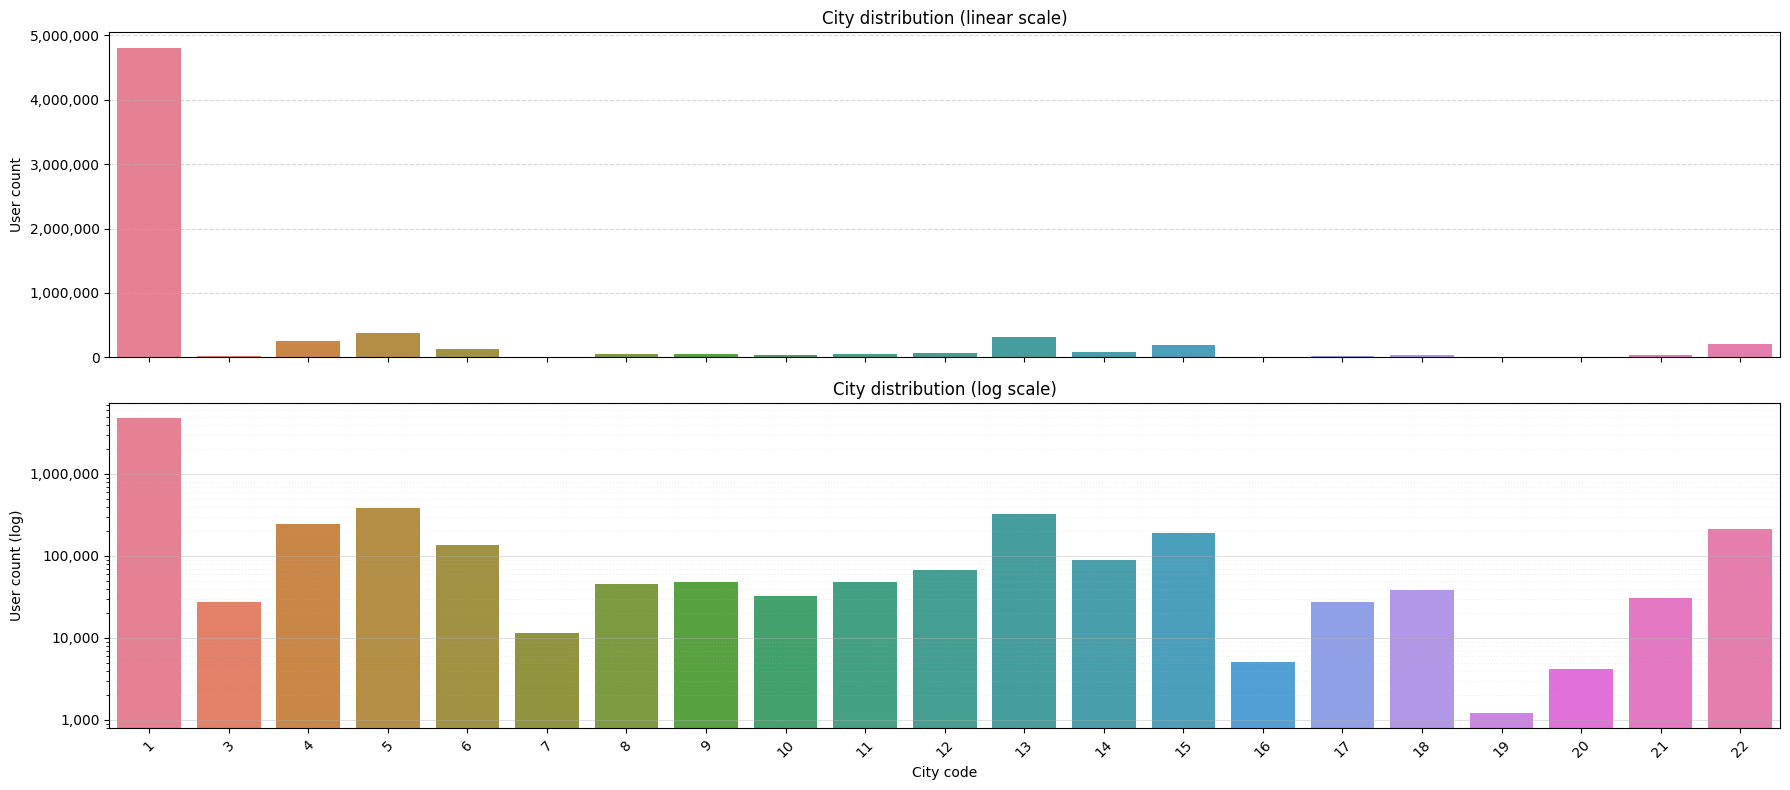

In [24]:
# city 코드 정렬 (결측/보정값 -1 제외하고 싶으면 조건 추가 가능)
order = sorted(members["city"].dropna().unique())

palette = sns.color_palette("husl", len(order))

fig, axes = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(18, 8),
    sharex=True
)

# =====================
# 위: 일반 스케일
# =====================
sns.countplot(
    x="city",
    hue="city",
    data=members,
    order=order,
    palette=palette,
    legend=False,
    ax=axes[0]
)

axes[0].set_title("City distribution (linear scale)")
axes[0].set_ylabel("User count")
axes[0].yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f"{int(x):,}")
)

# grid
axes[0].grid(True, which="both", axis="y", linestyle="--", alpha=0.5)

# =====================
# 아래: 로그 스케일
# =====================
sns.countplot(
    x="city",
    hue="city",
    data=members,
    order=order,
    palette=palette,
    legend=False,
    ax=axes[1]
)

axes[1].set_yscale("log")
axes[1].set_title("City distribution (log scale)")
axes[1].set_ylabel("User count (log)")
axes[1].yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f"{int(x):,}")
)

# grid
axes[1].grid(True, which="major", axis="y", linestyle="-", alpha=0.4)
axes[1].grid(True, which="minor", axis="y", linestyle=":", alpha=0.2)

# 공통 설정
axes[1].set_xlabel("City code")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## `bd`
- bd 컬럼에는 실제 연령 외에도 출생년도(YYYY)가 혼재되어 있어
1900–2017 범위의 값은 출생년도로 판단하여 연령으로 변환하였다.
이후 10세 미만 및 80세 초과 값은 비현실적인 값으로 간주하여
결측 처리하였다.
- 새로운 파생 컬럼 `bd_clean`

In [25]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [26]:
display(members["bd"].describe())
members["bd"].value_counts().sort_index()

count    6.769473e+06
mean     9.795794e+00
std      1.792590e+01
min     -7.168000e+03
25%      0.000000e+00
50%      0.000000e+00
75%      2.100000e+01
max      2.016000e+03
Name: bd, dtype: float64

bd
-7168          1
-6998          1
-6807          1
-6445          1
-5978          1
-3152          1
-2828          1
-1970          1
-974           1
-958           1
-956           1
-951           1
-540           1
-529           1
-527           1
-526           2
-525           1
-524           1
-523           5
-522           2
-521           2
-520           1
-519           6
-518           5
-517           5
-516           6
-515           3
-514           4
-513           2
-512           1
-511           4
-510           4
-509           3
-508           2
-507           1
-506           3
-505           2
-504           4
-503           5
-502           1
-501           1
-500           2
-498           1
-497           1
-496           1
-493           1
-489           1
-488           1
-484           1
-482           1
-178           1
-176           1
-52            4
-51           18
-50           13
-49           16
-48           19
-47            6
-46        

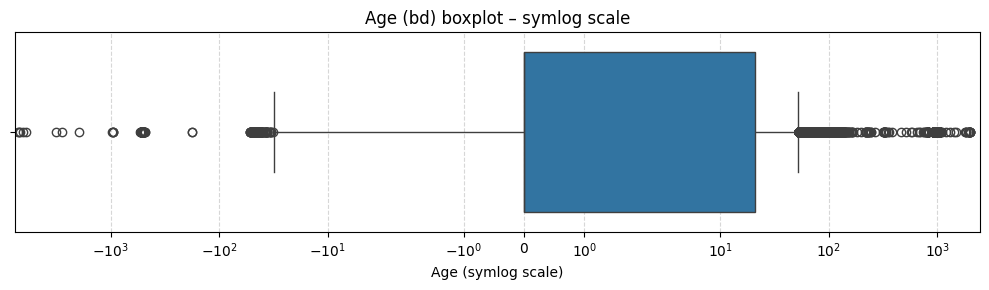

In [27]:
plt.figure(figsize=(10, 3))
sns.boxplot(
    x=members["bd"],
    orient="h"
)
plt.xscale("symlog")  # 0/음수까지 안전
plt.title("Age (bd) boxplot – symlog scale")
plt.xlabel("Age (symlog scale)")
plt.grid(axis="x", which="both", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

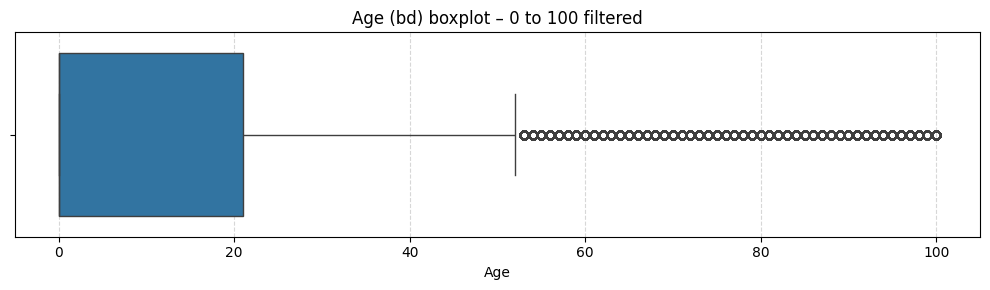

In [28]:
bd_valid = members["bd"][(members["bd"] >= 0) & (members["bd"] <= 100)]

plt.figure(figsize=(10, 3))
sns.boxplot(
    x=bd_valid,
    orient="h"
)
plt.title("Age (bd) boxplot – 0 to 100 filtered")
plt.xlabel("Age")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [29]:
T_YEAR = 2017

bd = pd.to_numeric(members["bd"], errors="coerce")

# 출생년도(YYYY) → 나이로 변환
birth_year_mask = (bd >= 1900) & (bd <= T_YEAR)
bd.loc[birth_year_mask] = T_YEAR - bd.loc[birth_year_mask]

# 나이 범위 필터링
bd.loc[(bd < 10) | (bd > 80)] = np.nan

members["bd_clean"] = bd

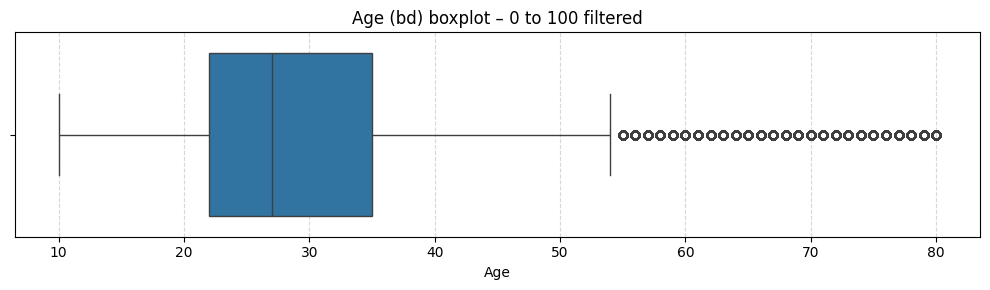

In [47]:
bd_valid = members["bd_clean"][(members["bd_clean"] >= 0) & (members["bd_clean"] <= 100)]

plt.figure(figsize=(10, 3))
sns.boxplot(
    x=bd_valid,
    orient="h"
)
plt.title("Age (bd) boxplot – 0 to 100 filtered")
plt.xlabel("Age")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

## `registered_via` 값 분포 시각화
1. -1 ~ 19까지
2. -1이 있다. 정상적인 가입 채널 코드가 없는 경우를 의미

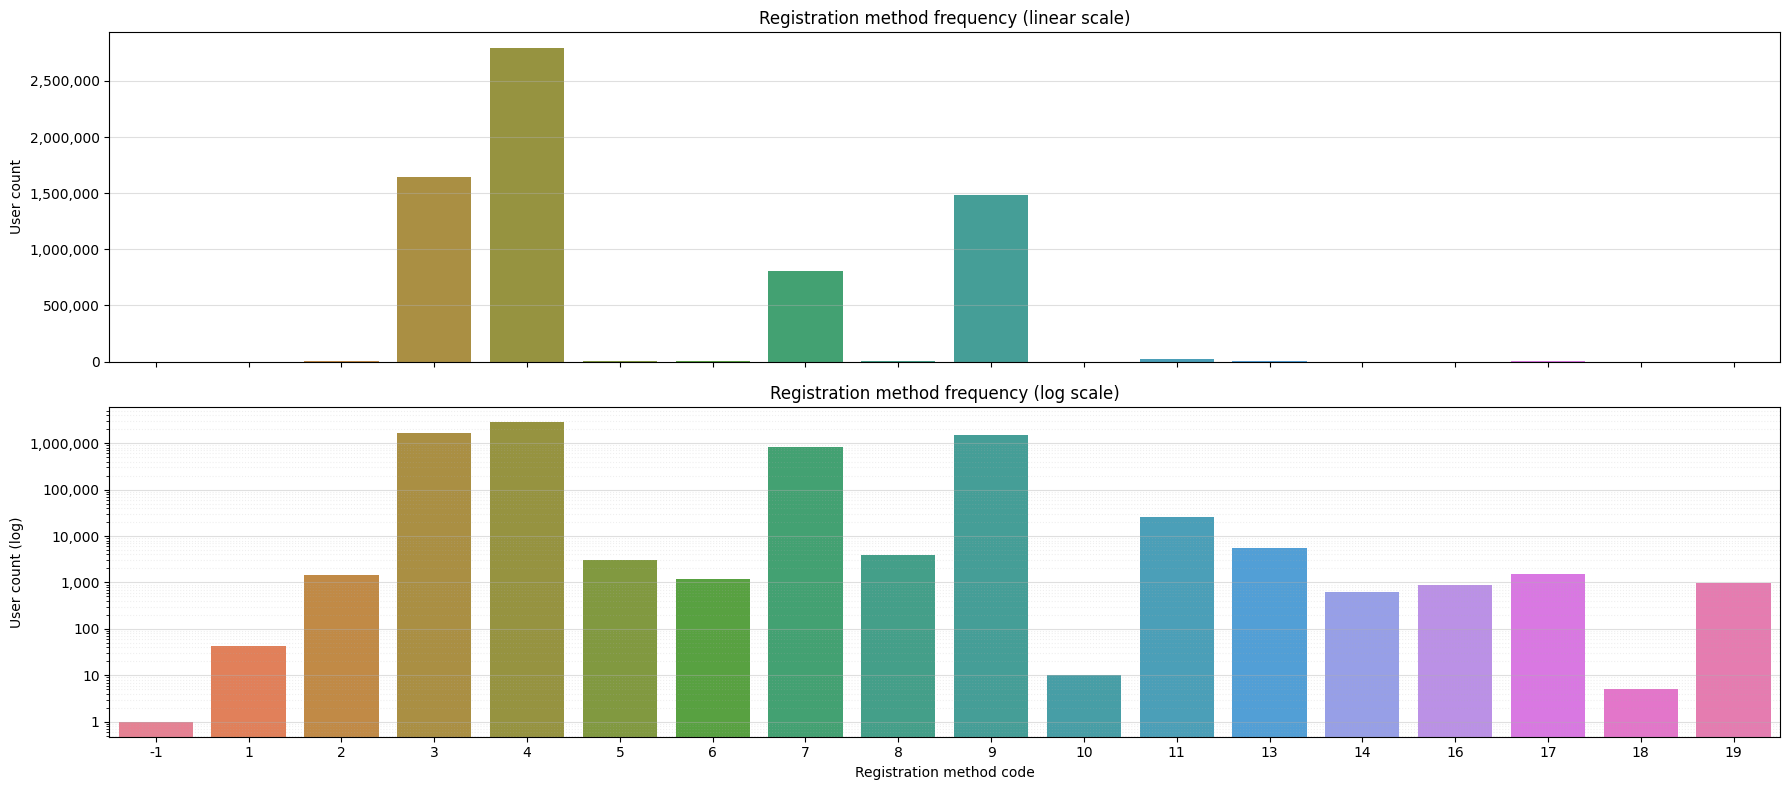

In [30]:
order = sorted(members["registered_via"].unique())
palette = sns.color_palette("husl", len(order))

fig, axes = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(18, 8),
    sharex=True
)

# =====================
# 위: 일반 스케일
# =====================
sns.countplot(
    x="registered_via",
    hue="registered_via",
    data=members,
    order=order,
    palette=palette,
    legend=False,
    ax=axes[0]
)

axes[0].set_title("Registration method frequency (linear scale)")
axes[0].set_ylabel("User count")
axes[0].yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f"{int(x):,}")
)

# =====================
# 아래: 로그 스케일
# =====================
sns.countplot(
    x="registered_via",
    hue="registered_via",
    data=members,
    order=order,
    palette=palette,
    legend=False,
    ax=axes[1]
)

axes[1].set_yscale("log")
axes[1].set_title("Registration method frequency (log scale)")
axes[1].set_ylabel("User count (log)")
axes[1].yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f"{int(x):,}")
)

axes[1].set_xlabel("Registration method code")

for ax in axes:
    ax.grid(True, which="major", axis="y", linestyle="-", alpha=0.4)
    ax.grid(True, which="minor", axis="y", linestyle=":", alpha=0.2)

# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## `registration_init_time`
- registration_init_time은 yyyymmdd 형식의 가입일 정보로,
직접적인 수치 변수로 사용하기보다는
예측 시점 기준 가입 후 경과 기간(days_since_registration)을
파생 변수로 생성하여 활용하였다.
원본 날짜 컬럼은 모델 입력 단계에서 제외한다.

In [31]:
members["registration_init_time"] = pd.to_datetime(
    members["registration_init_time"].astype(str),
    format="%Y%m%d",
    errors="coerce"
)

In [32]:
members["registration_init_time"].isna().mean()

np.float64(0.0)

## 가입일 분포 (연간)

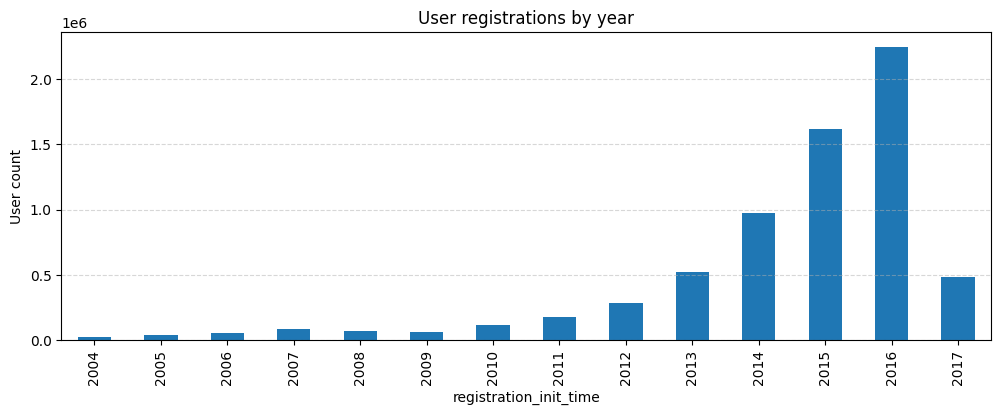

In [33]:
plt.figure(figsize=(12, 4))
members["registration_init_time"].dt.year.value_counts().sort_index().plot(kind="bar")
plt.title("User registrations by year")
plt.ylabel("User count")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

## 가입일 분포 (월간)
- 파생변수 `registration_month`

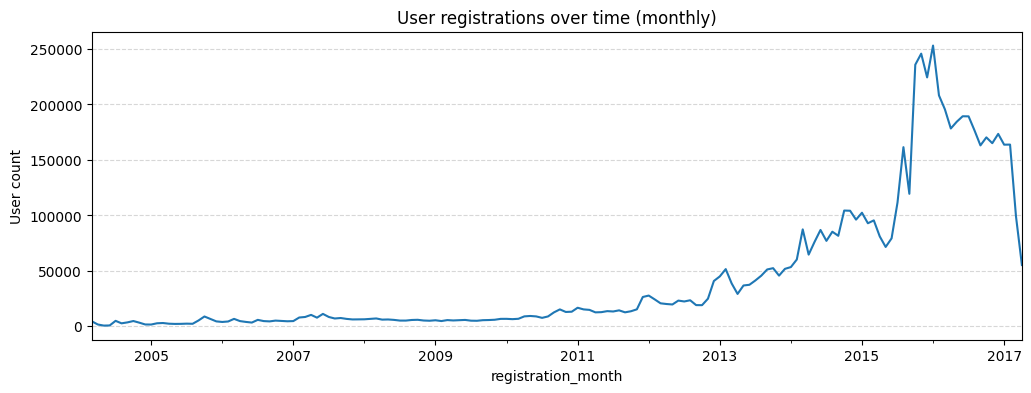

In [34]:
members["registration_month"] = members["registration_init_time"].dt.to_period("M")

members["registration_month"].value_counts().sort_index().plot(figsize=(12, 4))
plt.title("User registrations over time (monthly)")
plt.ylabel("User count")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

# members_with_label
## members <- INNER JOIN train
- members 데이터에 대해 EDA 및 전처리를 완료한 후,
train_v2의 is_churn 레이블을 msno 기준으로 INNER JOIN하여
학습 및 추론이 가능한 베이스 테이블을 구성하였다.

In [35]:
# 이미 EDA + 정제 끝난 members
members_clean = members.copy()

members_with_label = (
    members_clean
    .merge(
        train[["msno", "is_churn"]],
        on="msno",
        how="inner"
    )
)

In [36]:
members.shape, members_with_label.shape

((6769473, 8), (860967, 9))

In [37]:
members_with_label["is_churn"].value_counts(dropna=False)

is_churn
0    779519
1     81448
Name: count, dtype: int64

## 요약
```
members_with_label
 ├─ train_df  (is_churn notna)  → 모델 학습
 └─ infer_df  (is_churn isna)   → 예측 대상
```

- members 테이블에 train_v2의 is_churn 레이블을 결합한 결과,
다수의 사용자는 라벨이 없는 상태로 존재한다.
이는 데이터 결측이 아닌 학습 대상 외 사용자로 간주하며,
모델 학습 단계에서만 제외하고
추론 대상 풀로 유지한다.

In [38]:
# 저장
output_path = "members_with_label_base.parquet"

members_with_label.to_parquet(
    output_path,
    index=False
)

## memory usage 최적화!

In [39]:
path = "members_with_label_base.parquet"
df = pd.read_parquet(path)

def mem_mb(x: pd.DataFrame) -> float:
    return x.memory_usage(deep=True).sum() / (1024**2)

print("shape:", df.shape)
print("memory(MB):", round(mem_mb(df), 2))
df.dtypes

shape: (860967, 9)
memory(MB): 167.56


msno                              object
city                               int64
bd                                 int64
gender                            object
registered_via                     int64
registration_init_time    datetime64[ns]
bd_clean                         float64
registration_month             period[M]
is_churn                           int64
dtype: object

In [40]:
def optimize_dtypes(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    # 1) msno: 문자열(고유키) -> pandas string으로 (메모리/성능 괜찮음)
    if "msno" in df.columns:
        df["msno"] = df["msno"].astype("string")

    # 2) is_churn: 0/1/NaN -> pandas nullable Int8
    if "is_churn" in df.columns:
        df["is_churn"] = pd.to_numeric(df["is_churn"], errors="coerce").astype("Int8")

    # 3) datetime 계열은 datetime64[ns] 유지 (있으면)
    for c in df.columns:
        if "time" in c or c.endswith("_date"):
            # 이미 datetime이면 스킵
            if not np.issubdtype(df[c].dtype, np.datetime64):
                try:
                    df[c] = pd.to_datetime(df[c], errors="ignore")
                except Exception:
                    pass

    # 4) object/string 중 low-cardinality는 category로
    #    (예: gender, bd_bucket 같은 것들)
    for c in df.select_dtypes(include=["object", "string"]).columns:
        if c == "msno":
            continue
        nunique = df[c].nunique(dropna=True)
        n = len(df)
        # 카테고리화 기준(보수적): 유니크가 전체의 30% 이하 + 절대 유니크도 적당히
        if n > 0 and (nunique / n) <= 0.30 and nunique <= 5000:
            df[c] = df[c].astype("category")

    # 5) 숫자형 downcast (정보 손실 없음)
    # float -> float32 (대부분 충분). 단, 매우 큰 정밀도가 필요하면 float64 유지.
    float_cols = df.select_dtypes(include=["float64"]).columns
    for c in float_cols:
        df[c] = pd.to_numeric(df[c], downcast="float")

    # int -> smallest int (nullable 포함)
    int_cols = df.select_dtypes(include=["int64", "int32", "int16"]).columns
    for c in int_cols:
        df[c] = pd.to_numeric(df[c], downcast="integer")

    # pandas nullable Int로 되어 있는 컬럼들도, 값 범위에 따라 더 줄이기
    for c in df.columns:
        if str(df[c].dtype).startswith("Int"):
            # 이미 nullable int면 범위 보고 더 작은 걸로 바꿈
            s = df[c]
            if s.notna().any():
                mn = int(s.min())
                mx = int(s.max())
                # signed 범위 기준
                if -128 <= mn and mx <= 127:
                    df[c] = s.astype("Int8")
                elif -32768 <= mn and mx <= 32767:
                    df[c] = s.astype("Int16")
                elif -2147483648 <= mn and mx <= 2147483647:
                    df[c] = s.astype("Int32")

    # 6) bool 후보: 값이 {0,1}만인 정수/float 컬럼을 boolean으로
    for c in df.columns:
        if c == "is_churn":
            continue
        if pd.api.types.is_integer_dtype(df[c]) or pd.api.types.is_float_dtype(df[c]):
            vals = df[c].dropna().unique()
            if len(vals) > 0 and set(vals).issubset({0, 1}):
                df[c] = df[c].astype("boolean")

    return df

In [41]:
before = mem_mb(df)
df_opt = optimize_dtypes(df)
after = mem_mb(df_opt)

print("memory before(MB):", round(before, 2))
print("memory after(MB): ", round(after, 2))
print("saved(%):", round((1 - after / before) * 100, 2))
df_opt.dtypes

memory before(MB): 167.56
memory after(MB):  98.53
saved(%): 41.2


msno                      string[python]
city                                int8
bd                                 int16
gender                          category
registered_via                      int8
registration_init_time    datetime64[ns]
bd_clean                         float32
registration_month             period[M]
is_churn                            Int8
dtype: object

In [42]:
out_path = "members_with_label_base_optimized.parquet"
df_opt.to_parquet(out_path, index=False)
print("saved:", out_path)

saved: members_with_label_base_optimized.parquet


In [43]:
# 라벨 분포 동일?
print(df["is_churn"].value_counts(dropna=False))
print(df_opt["is_churn"].value_counts(dropna=False))

# row 수 동일?
print(df.shape, df_opt.shape)

is_churn
0    779519
1     81448
Name: count, dtype: int64
is_churn
0    779519
1     81448
Name: count, dtype: Int64
(860967, 9) (860967, 9)


In [44]:
df = pd.read_parquet("../data/processed/members_with_label_base_optimized.parquet")

def mem_mb(x: pd.DataFrame) -> float:
    return x.memory_usage(deep=True).sum() / (1024**2)

print("shape:", df.shape)
print("memory(MB):", round(mem_mb(df), 2))
df.dtypes

shape: (6769473, 9)
memory(MB): 774.71


msno                      string[python]
city                                int8
bd                                 int16
gender                          category
registered_via                      int8
registration_init_time    datetime64[ns]
bd_clean                         float32
registration_month             period[M]
is_churn                            Int8
dtype: object

In [45]:
df["msno"].sort_values()

KeyboardInterrupt: 